In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image

In [ ]:
import os
import errno


try:
    data_dir = 'dataset'
    os.mkdir(data_dir)
except OSError as e:
    if e.errno == errno.EEXIST:
        print('Directory  created.')
    else:
        raise

In [ ]:
dataset_name = "cifar10"

In [ ]:
(train_set, test_set), dataset_info =  tfds.load(
              name=dataset_name,
              split=["train", "test"],
              with_info=True,
              data_dir=data_dir
          )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling dataset/cifar10/incomplete.D2QZOI_3.0.2/cifar10-train.tfrecord*...:   0%|          | 0/50000 [00:00<…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling dataset/cifar10/incomplete.D2QZOI_3.0.2/cifar10-test.tfrecord*...:   0%|          | 0/10000 [00:00<?…

Dataset cifar10 downloaded and prepared to dataset/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir=PosixGPath('/tmp/tmpp26gyiqgtfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mu

In [ ]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)
print('num test data  :', dataset_info.splits["test"].num_examples)

image shape    : (32, 32, 3)
image dtype    : <dtype: 'uint8'>

num class      :  10
class label    : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num train data : 50000
num test data  : 10000


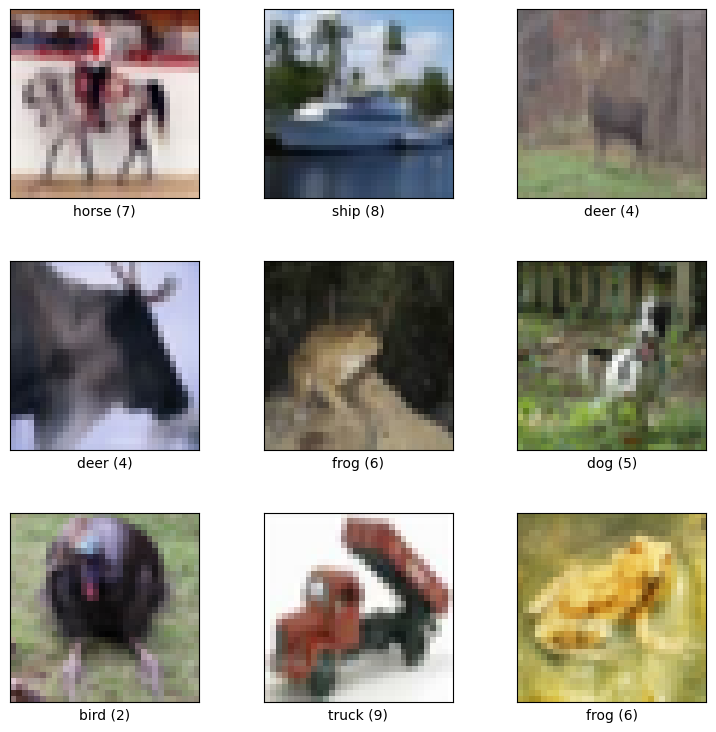

In [ ]:
fig = tfds.show_examples(train_set, dataset_info)

In [ ]:
input_shape = (80, 80, 3)

In [ ]:
X_train = []
y_train = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA)
    X_train.append(new_img)
    y_train.append(example['label'])

del train_set

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_train.shape = (50000, 80, 80, 3)
y_train.shape = (50000,)


In [ ]:
X_test = []
y_test = []

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA)
    X_test.append(new_img)
    y_test.append(example['label'])

del test_set

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print('X_test.shape =',X_test.shape)
print('y_test.shape =',y_test.shape)

X_test.shape = (10000, 80, 80, 3)
y_test.shape = (10000,)


In [ ]:
X_val   = X_train[-300:]
y_val   = y_train[-300:]

X_train = X_train[:-300]
y_train = y_train[:-300]

In [ ]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49700, 80, 80, 3)
y_train.shape = (49700,)

X_val.shape  = (300, 80, 80, 3)
y_val.shape  = (300,)

X_test.shape  = (10000, 80, 80, 3)
y_test.shape  = (10000,)


In [ ]:
y_train_hot = to_categorical(y_train, 102)
y_val_hot   = to_categorical(y_val, 102)
y_test_hot  = to_categorical(y_test, 102)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49700, 102)
y_val_hot.shape   = (300, 102)
y_test_hot.shape  = (10000, 102)


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
x = model.layers[-1].output
x = GlobalAveragePooling2D() (x)
predictions = Dense(102, activation='softmax') (x)

myModel = Model(inputs=model.input, outputs=predictions)

In [ ]:
myModel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 80, 80, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 39, 39, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 39, 39, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 39, 39, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 37, 37, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 37, 37, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 37, 37, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 37, 37, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 37, 37, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 37, 37, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 18, 18, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 18, 18, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 18, 18, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 18, 18, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 16, 16, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 54,493,510 (207.88 MB)

 Trainable params: 54,432,966 (207.65 MB)

 Non-trainable params: 60,544 (236.50 KB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.14318 to fit



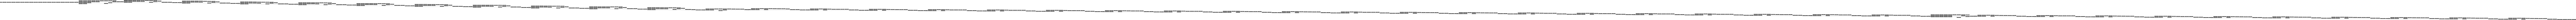

In [ ]:
plot_model(model, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

In [ ]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if (epoch > 30):
        lr *= 0.01
    elif (epoch > 20):
        lr *= 0.1
    return lr

lr_callback = LearningRateScheduler(lr_schedule)

myCheckpoint = ModelCheckpoint(filepath='./dataset/my_model.h5',
                               monitor='val_accuracy',
                               save_best_only=True,
                              )

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=./dataset/my_model.h5

In [ ]:
history_all = []

In [ ]:
batch_size = 64
epochs = 12

In [ ]:
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

history = myModel.fit(
    augmented_train,
    validation_data=(X_val, y_val_hot),
    epochs=epochs,
    steps_per_epoch=len(X_train)/64,
    callbacks=[lr_callback, myCheckpoint],
    verbose=2)

history_all.append(history)

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
hist_train = []
hist_val = []

In [ ]:
for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)
plt.rcParams['figure.figsize'] = [7, 5]

In [ ]:
plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
myModel.load_weights('./dataset/my_model.h5')
scores = myModel.evaluate(X_test, y_test_hot)

In [ ]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

In [ ]:
train_scores = myModel.evaluate(X_train, y_train_hot)
test_scores  = myModel.evaluate(X_test, y_test_hot)
val_scores   = myModel.evaluate(X_val, y_val_hot)

In [ ]:
print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))